In [1]:
# Imports and options
import pandas as pd
import numpy as np
# # import matplotlib as plt
import pickle
import re
from random import randint
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , cross_val_score ,cross_val_predict
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
# # from seaborn import plt
from math import sqrt
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV, ElasticNetCV, Lasso
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error,median_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import datetime
%matplotlib inline

# Pandas display options
pd.options.display.max_columns = 40
pd.options.display.max_rows = 200

 # Define functions for graphs:


In [2]:
def make_hist(df, column, title=None, xlabel='', pct=False, range=None):
    multiplier = 1
    if pct == True:
        multiplier = 100
    fig = plt.figure(figsize=(10,4))
    plt.hist(df[column]*multiplier, bins=50, range=range)
    plt.ylabel('Count')
    plt.xlabel(xlabel if xlabel else '')
    plt.title(column if not title else title)

In [3]:
def make_box(df, xcolumn, title=None, ylabel='', xlabel='', pct=False):
    multiplier = 1
    if pct == True:
        multiplier = 100
    fig = plt.figure(figsize=(10,4))
    ax = sns.boxplot(x=df[xcolumn]*multiplier, showfliers=False, palette="deep")
    ax.set(title=xcolumn if not title else title)
    ax.set(xlabel=xcolumn if not xlabel else xlabel )
    return ax

In [4]:
def make_line(df, xcolumn, ycolumn, title=None, ylabel='', xlabel='Date', pct=False):
    multiplier = 1
    if pct == True:
        multiplier = 100
    fig = plt.figure(figsize=(10,4))
    plt.plot(df[xcolumn], df[ycolumn]*multiplier, linewidth=1)
    plt.title(xcolumn if not title else title)
    plt.ylabel(ylabel if ylabel else '')
    plt.xlabel(xlabel)
    plt.xticks(rotation=45)
    return plt

In [5]:
def make_bar(df, xcolumn, ycolumn, title=None, xlabel='', ylabel='', pct=False , sort = False):
    fig = plt.figure(figsize=(10,4))
    if pct == True:
        df[ycolumn] = df[ycolumn] * 100
    if sort == True:
        ax = df.groupby(xcolumn)[ycolumn].mean().sort_values().plot(kind = 'bar' ,color='cornflowerblue')
    else:
        ax = df.groupby(xcolumn)[ycolumn].mean().plot(kind = 'bar' ,color='cornflowerblue')
    
    plt.xlabel(xlabel if xlabel else '')
    plt.ylabel(ylabel if ylabel else '')
    plt.title(xcolumn if not title else title)

In [6]:
def drop_columns(df, columns):
    '''Drops a list of columns in a dataframe'''
    for c in columns:
        df.drop(c, axis = 1, inplace = True)
        
def get_percent(part, whole):
    return round(100 * float(part)/float(whole), 2)

def unique_list(l):
    '''makes a unique list'''
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist

# Cleaning functions ( date , sizes ,  

In [7]:
def extract_date_part(df):
    df['year'] = df.sale_date_time.dt.year
    df['month'] = df.sale_date_time.dt.month
    df['day'] = df.sale_date_time.dt.day
    df['hour'] = df.sale_date_time.dt.hour
    df['sale_date'] = df.sale_date_time.dt.date

# Load Data

In [8]:
df = pd.read_csv("finally_cleaned.csv" , parse_dates = ['release_date','sale_date_time'])


C:\Users\chenz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2,5,6,11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
img_url = pd.read_csv("url_list_adidas.csv")

In [10]:
df = pd.merge(df,img_url,on='url_list')
df

,api_list,average_sale,description,information,name,no_of_sales,percentage_profit,url_list,product_id_list,sale_date_time,sale_price,sale_size,style,colorway,retail_price,release_date,brand,num_of_days,quarter,category,img_url
0,https://stockx.com/api/products/fcdd291b-cd65-...,$311,electrify your sneaker rotation with the adida...,"style, ef2905 ,colorway, static/static/static ...",adidas yeezy boost 350 v2 static,28009,130,https://stockx.com/adidas-yeezy-boost-350-v2-s...,fcdd291b-cd65-4e82-b57f-4ca2b478e153,2019-05-17 10:41:16,320.0,13,ef2905,static/static/static,220,2018-12-27,adidas,141,4,man,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...
1,https://stockx.com/api/products/fcdd291b-cd65-...,$311,electrify your sneaker rotation with the adida...,"style, ef2905 ,colorway, static/static/static ...",adidas yeezy boost 350 v2 static,28009,130,https://stockx.com/adidas-yeezy-boost-350-v2-s...,fcdd291b-cd65-4e82-b57f-4ca2b478e153,2019-05-17 09:02:46,360.0,11.5,ef2905,static/static/static,220,2018-12-27,adidas,141,4,man,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...
2,https://stockx.com/api/products/fcdd291b-cd65-...,$311,electrify your sneaker rotation with the adida...,"style, ef2905 ,colorway, static/static/static ...",adidas yeezy boost 350 v2 static,28009,130,https://stockx.com/adidas-yeezy-boost-350-v2-s...,fcdd291b-cd65-4e82-b57f-4ca2b478e153,2019-05-17 07:40:27,506.0,6,ef2905,static/static/static,220,2018-12-27,adidas,141,4,man,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...
3,https://stockx.com/api/products/fcdd291b-cd65-...,$311,electrify your sneaker rotation with the adida...,"style, ef2905 ,colorway, static/static/static ...",adidas yeezy boost 350 v2 static,28009,130,https://stockx.com/adidas-yeezy-boost-350-v2-s...,fcdd291b-cd65-4e82-b57f-4ca2b478e153,2019-05-17 07:12:01,320.0,13,ef2905,static/static/static,220,2018-12-27,adidas,141,4,man,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...
4,https://stockx.com/api/products/fcdd291b-cd65-...,$311,electrify your sneaker rotation with the adida...,"style, ef2905 ,colorway, static/static/static ...",adidas yeezy boost 350 v2 static,28009,130,https://stockx.com/adidas-yeezy-boost-350-v2-s...,fcdd291b-cd65-4e82-b57f-4ca2b478e153,2019-05-17 07:05:31,395.0,9.5,ef2905,static/static/static,220,2018-12-27,adidas,141,4,man,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...
5,https://stockx.com/api/products/fcdd291b-cd65-...,$311,electrify your sneaker rotation with the adida...,"style, ef2905 ,colorway, static/static/static ...",adidas yeezy boost 350 v2 static,28009,130,https://stockx.com/adidas-yeezy-boost-350-v2-s...,fcdd291b-cd65-4e82-b57f-4ca2b478e153,2019-05-17 06:45:44,375.0,11,ef2905,static/static/static,220,2018-12-27,adidas,141,4,man,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...
6,https://stockx.com/api/products/fcdd291b-cd65-...,$311,electrify your sneaker rotation with the adida...,"style, ef2905 ,colorway, static/static/static ...",adidas yeezy boost 350 v2 static,28009,130,https://stockx.com/adidas-yeezy-boost-350-v2-s...,fcdd291b-cd65-4e82-b57f-4ca2b478e153,2019-05-17 06:33:38,382.0,10,ef2905,static/static/static,220,2018-12-27,adidas,141,4,man,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...
7,https://stockx.com/api/products/fcdd291b-cd65-...,$311,electrify your sneaker rotation with the adida...,"style, ef2905 ,colorway, static/static/static ...",adidas yeezy boost 350 v2 static,28009,130,https://stockx.com/adidas-yeezy-boost-350-v2-s...,fcdd291b-cd65-4e82-b57f-4ca2b478e153,2019-05-17 06:12:36,315.0,13,ef2905,static/static/static,220,2018-12-27,adidas,141,4,man,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...
8,https://stockx.com/api/products/fcdd291b-cd65-...,$311,electrify your sneaker rotation with the adida...,"style, ef2905 ,colorway, static/static/static ...",adidas yeezy boost 350 v2 static,28009,130,https://stockx.com/adidas-yeezy-boost-350-v2-s...,fcdd291b-cd65-4e82-b57f-4ca2b478e153,2019-05-17 06:08:30,379.0,10,ef2905,static/static/static,2

In [11]:
drop_list = ['api_list','average_sale','description','information','percentage_profit','url_list','product_id_list','quarter','category','no_of_sales']

In [12]:
df.drop(columns = drop_list,inplace = True)

# Adidas ONLY

In [13]:
df = df[df['brand']=='adidas']

In [14]:
adidas_df = df.copy(deep=True)

In [15]:
# del df

In [16]:
mask = (adidas_df['release_date'] > '2017-12-31') & (adidas_df['release_date'] <= '2018-12-31')

In [17]:
adidas_df = adidas_df.loc[mask]

In [18]:
adidas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376796 entries, 0 to 376795
Data columns (total 11 columns):
name              376796 non-null object
sale_date_time    376796 non-null datetime64[ns]
sale_price        376796 non-null float64
sale_size         376796 non-null object
style             376796 non-null object
colorway          376796 non-null object
retail_price      376796 non-null object
release_date      376796 non-null datetime64[ns]
brand             376796 non-null object
num_of_days       376796 non-null int64
img_url           376796 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 34.5+ MB


In [19]:
len(adidas_df.name.unique())

68

In [20]:
## Add a num_sales (frequency) column
adidas_df['num_sales'] = adidas_df.groupby('name')['name'].transform('count')

In [21]:
#include on shoes with higher than average sales
adidas_df = adidas_df[adidas_df.num_sales > 1000]

In [22]:
adidas_df.drop(adidas_df[adidas_df['retail_price'] =="na"].index, inplace = True)

In [23]:
adidas_df.reset_index(drop = True , inplace = True)

# Extract the day, time , hour , date

In [24]:
extract_date_part(adidas_df)

In [25]:
adidas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371190 entries, 0 to 371189
Data columns (total 17 columns):
name              371190 non-null object
sale_date_time    371190 non-null datetime64[ns]
sale_price        371190 non-null float64
sale_size         371190 non-null object
style             371190 non-null object
colorway          371190 non-null object
retail_price      371190 non-null object
release_date      371190 non-null datetime64[ns]
brand             371190 non-null object
num_of_days       371190 non-null int64
img_url           371190 non-null object
num_sales         371190 non-null int64
year              371190 non-null int64
month             371190 non-null int64
day               371190 non-null int64
hour              371190 non-null int64
sale_date         371190 non-null object
dtypes: datetime64[ns](2), float64(1), int64(6), object(8)
memory usage: 48.1+ MB


# Clean Shoe sizes . Turn into float

In [26]:
adidas_df.sale_size = adidas_df.sale_size.astype(float)

In [27]:
adidas_df.sale_size.value_counts().mean()

14847.6

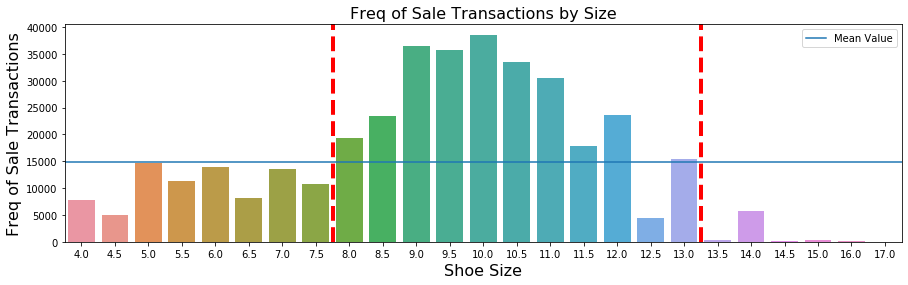

In [28]:
fig = plt.figure(figsize=(15,4))
sns.countplot(adidas_df.sale_size)
plt.axhline(y=adidas_df.sale_size.value_counts().mean() , label = "Mean Value")
plt.xlabel('Shoe Size', fontsize=16)
plt.ylabel('Freq of Sale Transactions', fontsize=16)
plt.axvline(x= 7.51, ls = "--",color='r' , linewidth=4)
plt.axvline(x= 18.5, ls = "--",color='r' , linewidth=4)
plt.title("Freq of Sale Transactions by Size" , fontsize = 16)
plt.legend()
plt.show()


# Group shoe sizes into 0/1

In [29]:
def core_fringe(x):
    """converts shoe size into 1 for fringe or 0 for core sizing"""
    if x < 8:
        x = 0
    elif x > 13:
        x = 0
    else:
        x = 1
    return x

In [30]:
# 1 for popular sizes. 0 for not popular sizes
adidas_df['size_category'] = adidas_df['sale_size'].apply(lambda x: core_fringe(x))

In [31]:
adidas_df['size_category'].value_counts()

1    279161
0     92029
Name: size_category, dtype: int64

In [32]:
adidas_df['name'] = adidas_df['name'].apply(lambda x : x.replace('adidas',""))

In [33]:
adidas_df['line'] = adidas_df['name'].str.split().str.get(0).str.lower()

In [34]:
adidas_df.line.value_counts()[0:3]

yeezy    247194
ultra     46009
nmd       40237
Name: line, dtype: int64

# Group shoe colors into basic colors

In [35]:
adidas_df['colorway'] = adidas_df['colorway'].apply(lambda x : x.split("/")[0])

In [36]:
adidas_df["shoe_basic_color"] = np.where(adidas_df.colorway.str.contains("black"), "black",
                              (np.where(adidas_df.colorway.str.contains("grey"), "grey", 
                              (np.where(adidas_df.colorway.str.contains("white"), "white","others")))))

In [37]:
adidas_df["shoe_basic_color"].value_counts()

others    257387
black      76223
white      37580
Name: shoe_basic_color, dtype: int64

In [38]:
adidas_df.columns

Index(['name', 'sale_date_time', 'sale_price', 'sale_size', 'style',
       'colorway', 'retail_price', 'release_date', 'brand', 'num_of_days',
       'img_url', 'num_sales', 'year', 'month', 'day', 'hour', 'sale_date',
       'size_category', 'line', 'shoe_basic_color'],
      dtype='object')

# Quick EDA

In [39]:
adidas_df.drop(columns = "num_sales", inplace = True)

In [40]:
yeezy = adidas_df[adidas_df.line == 'yeezy'].copy(deep = True)

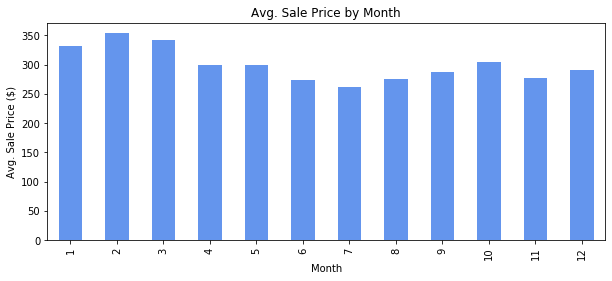

In [41]:
make_bar(yeezy, 'month', 'sale_price', title="Avg. Sale Price by Month", 
         xlabel='Month', ylabel="Avg. Sale Price ($)")

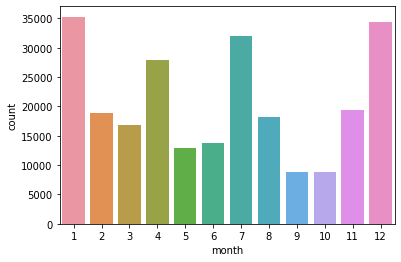

In [42]:
sns.countplot(yeezy.month)

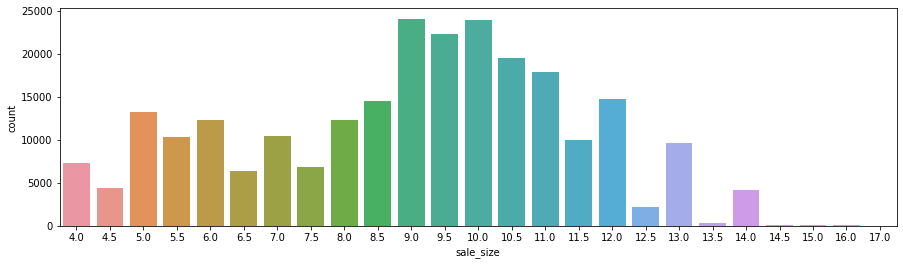

In [43]:
fig = plt.figure(figsize=(15,4))
sns.countplot(yeezy.sale_size)

In [44]:
# name	
# weekday	
# shoe_size	
# sale_price	
# sale_date_time	
# shoe_name	
# year	
# month	
# day	hour	
# sale_date	
# line	
# brand	
# size_number	
# colorway	
# image_url	
# original_retail	
# release_date	
# style_code	
# main_color

In [45]:
flask_df = yeezy.rename(columns={"sale_size": "size_number","name": "shoe_name","size_category":"shoe_size",
                                                    "shoe_basic_color":"main_color","style":"style_code","retail_price":"original_retail"})

In [46]:
flask_df

,shoe_name,sale_date_time,sale_price,size_number,style_code,colorway,original_retail,release_date,brand,num_of_days,img_url,year,month,day,hour,sale_date,shoe_size,line,main_color
0,yeezy boost 350 v2 static,2019-05-17 10:41:16,320.0,13.0,ef2905,static,220,2018-12-27,adidas,141,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...,2019,5,17,10,2019-05-17,1,yeezy,others
1,yeezy boost 350 v2 static,2019-05-17 09:02:46,360.0,11.5,ef2905,static,220,2018-12-27,adidas,141,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...,2019,5,17,9,2019-05-17,1,yeezy,others
2,yeezy boost 350 v2 static,2019-05-17 07:40:27,506.0,6.0,ef2905,static,220,2018-12-27,adidas,141,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...,2019,5,17,7,2019-05-17,0,yeezy,others
3,yeezy boost 350 v2 static,2019-05-17 07:12:01,320.0,13.0,ef2905,static,220,2018-12-27,adidas,141,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...,2019,5,17,7,2019-05-17,1,yeezy,others
4,yeezy boost 350 v2 static,2019-05-17 07:05:31,395.0,9.5,ef2905,static,220,2018-12-27,adidas,141,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...,2019,5,17,7,2019-05-17,1,yeezy,others
5,yeezy boost 350 v2 static,2019-05-17 06:45:44,375.0,11.0,ef2905,static,220,2018-12-27,adidas,141,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...,2019,5,17,6,2019-05-17,1,yeezy,others
6,yeezy boost 350 v2 static,2019-05-17 06:33:38,382.0,10.0,ef2905,static,220,2018-12-27,adidas,141,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...,2019,5,17,6,2019-05-17,1,yeezy,others
7,yeezy boost 350 v2 static,2019-05-17 06:12:36,315.0,13.0,ef2905,static,220,2018-12-27,adidas,141,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...,2019,5,17,6,2019-05-17,1,yeezy,others
8,yeezy boost 350 v2 static,2019-05-17 06:08:30,379.0,10.0,ef2905,static,220,2018-12-27,adidas,141,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...,2019,5,17,6,2019-05-17,1,yeezy,others
9,yeezy boost 350 v2 static,2019-05-17 06:04:29,330.0,12.0,ef2905,static,220,2018-12-27,adidas,141,'https://stockx-360.imgix.net/Adidas-Yeezy-Boo...,2019,5,17,6,2019-05-17,1,yeezy,others


In [47]:
flask_df.drop(columns ="num_of_days" ,inplace = True)

In [48]:
with open('final_sales_history.pkl', 'wb') as picklefile:
    pickle.dump(flask_df, picklefile)

In [49]:
yeezy.sale_date_time.max()

Timestamp('2019-05-17 11:15:46')

# Feature Engineering

In [50]:
shoes = yeezy[['name', 'sale_date','size_category', 'sale_price']].groupby(['name', 'sale_date','size_category'])

In [51]:
# Aggregate to sales by day
shoes = shoes.aggregate(['mean', 'count']).reset_index()
shoes

name   sale_date size_category  \
                                                                         
0                            yeezy 500 blush  2018-02-14             1   
1                            yeezy 500 blush  2018-02-16             0   
2                            yeezy 500 blush  2018-02-16             1   
3                            yeezy 500 blush  2018-02-17             0   
4                            yeezy 500 blush  2018-02-17             1   
5                            yeezy 500 blush  2018-02-18             0   
6                            yeezy 500 blush  2018-02-18             1   
7                            yeezy 500 blush  2018-02-19             0   
8                            yeezy 500 blush  2018-02-19             1   
9                            yeezy 500 blush  2018-02-20             1   
10                           yeezy 500 blush  2018-02-21             0   
11                           yeezy 500 blush  2018-02-21             1   
12                           yeezy 500 blush  2018-02-22             0   
13                           yeezy 500 blush  2018-02-22             1   
14                           yeezy 500 blush  2018-02-23             0   
15                           yeezy 500 blush  2018-02-23             1   
16                           yeezy 500 blush  2018-02-24             0   
17                           yeezy 500 blush  2018-02-24             1   
18                           yeezy 500 blush  2018-02-25             0   
19                           yeezy 500 blush  2018-02-25             1   
20                           yeezy 500 blush  2018-02-26             0   
21                           yeezy 500 blush  2018-02-26             1   
22                           yeezy 500 blush  2018-02-27             0   
23                           yeezy 500 blush  2018-02-27             1   
24                           yeezy 500 blush  2018-02-28             0   
25                           yeezy 500 blush  2018-02-28             1   
26                           yeezy 500 blush  2018-03-01             0   
27                           yeezy 500 blush  2018-03-01             1   
28                           yeezy 500 blush  2018-03-02             0   
29                           yeezy 500 blush  2018-03-02             1   
30                           yeezy 500 blush  2018-03-03             0   
31                           yeezy 500 blush  2018-03-03             1   
32                           yeezy 500 blush  2018-03-04             0   
33                           yeezy 500 blush  2018-03-04             1   
34                           yeezy 500 blush  2018-03-05             0   
35                           yeezy 500 blush  2018-03-05             1   
36                           yeezy 500 blush  2018-03-06             0   
37                           yeezy 500 blush  2018-03-06             1   
38                           yeezy 500 blush  2018-03-07             0   
39                           yeezy 500 blush  2018-03-07             1   
40                           yeezy 500 blush  2018-03-08             1   
41                           yeezy 500 blush  2018-03-09             0   
42                           yeezy 500 blush  2018-03-09             1   
43                           yeezy 500 blush  2018-03-10             0   
44                           yeezy 500 blush  2018-03-10             1   
45                           yeezy 500 blush  2018-03-11             0   
46                           yeezy 500 blush  2018-03-11             1   
47                           yeezy 500 blush  2018-03-12             0   
48                           yeezy 500 blush  2018-03-12             1   
49                           yeezy 500 blush  2018-03-13             0   
50                           yeezy 500 blush  2018-03-13             1   
51                           yeezy 500 blush  2018-03-14             1   
52                           yeezy 500 blush

In [52]:
# Collapse the header
shoes.columns = shoes.columns.droplevel(0)

In [53]:
shoes = pd.DataFrame(shoes)

In [54]:
shoes

,,,,mean,count
0,yeezy 500 blush,2018-02-14,1,875.000000,2
1,yeezy 500 blush,2018-02-16,0,624.000000,2
2,yeezy 500 blush,2018-02-16,1,657.055556,18
3,yeezy 500 blush,2018-02-17,0,550.000000,1
4,yeezy 500 blush,2018-02-17,1,666.222222,18
5,yeezy 500 blush,2018-02-18,0,580.200000,5
6,yeezy 500 blush,2018-02-18,1,666.944444,18
7,yeezy 500 blush,2018-02-19,0,542.500000,4
8,yeezy 500 blush,2018-02-19,1,685.625000,8
9,yeezy 500 blush,2018-02-20,1,692.384615,13


In [55]:
shoes.columns = ['name', 'sale_date','size_category', 'sale_price', 'volume']

In [56]:
shoes

,name,sale_date,size_category,sale_price,volume
0,yeezy 500 blush,2018-02-14,1,875.000000,2
1,yeezy 500 blush,2018-02-16,0,624.000000,2
2,yeezy 500 blush,2018-02-16,1,657.055556,18
3,yeezy 500 blush,2018-02-17,0,550.000000,1
4,yeezy 500 blush,2018-02-17,1,666.222222,18
5,yeezy 500 blush,2018-02-18,0,580.200000,5
6,yeezy 500 blush,2018-02-18,1,666.944444,18
7,yeezy 500 blush,2018-02-19,0,542.500000,4
8,yeezy 500 blush,2018-02-19,1,685.625000,8
9,yeezy 500 blush,2018-02-20,1,692.384615,13


In [57]:
# add back in the other information about the shoe
more_info = (yeezy[['name', 'shoe_basic_color', 'line','release_date', 'retail_price', 'colorway']].drop_duplicates())
shoes = shoes.merge(more_info, on = 'name')

In [58]:
shoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5847 entries, 0 to 5846
Data columns (total 10 columns):
name                5847 non-null object
sale_date           5847 non-null object
size_category       5847 non-null int64
sale_price          5847 non-null float64
volume              5847 non-null int64
shoe_basic_color    5847 non-null object
line                5847 non-null object
release_date        5847 non-null datetime64[ns]
retail_price        5847 non-null object
colorway            5847 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 502.5+ KB


C:\Users\chenz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


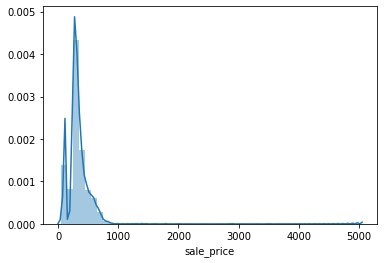

In [59]:
sns.distplot(shoes.sale_price)

# Log the sale price

In [60]:
# Take the log of the sale price
shoes['log_sale_price'] = np.log(shoes.sale_price)

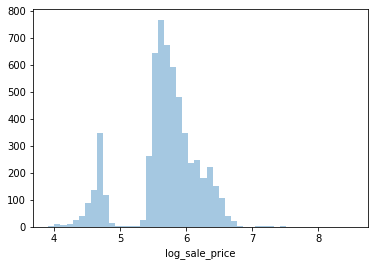

In [61]:
sns.distplot(shoes['log_sale_price'], kde = False)

In [62]:
shoes['sale_date'] = pd.to_datetime(shoes['sale_date'])

In [63]:
shoes['time_since_release'] = shoes['sale_date'] - shoes['release_date']

In [64]:
shoes['total_days_td'] = shoes['time_since_release'].dt.total_seconds() / (24 * 60 * 60)

In [65]:
shoes.drop(shoes[shoes['total_days_td']<0].index, inplace = True)

In [66]:
shoes.reset_index(drop = True , inplace = True)

In [67]:
# from statsmodels.tsa.stattools import acf , adfuller
# from statsmodels.graphics.tsaplots import plot_acf

In [68]:
# not_random_shoes = []
# random_shoes =[]
# for chosen_shoe in set(shoes.name):
#     results = adfuller(shoes[shoes['name'] == chosen_shoe]['sale_price'].pct_change().dropna())
#     results
#     if results[1] <0.05:
#         random = "Not Random"
#         not_random_shoes.append(chosen_shoe)
#     else:
#         random_shoes.append(chosen_shoe)
    

In [69]:
# for chosen_shoe in set(shoes.name):
#     fig = plt.figure(figsize=(15,4))
#     plot_acf(shoes[shoes['name'] == chosen_shoe]['sale_price'].dropna() , lags = 50)
#     plt.show()

In [70]:
# chosen_shoe = shoes.loc[randint(0, len(shoes))]['name']
# chosen_shoe

# acf_array = acf(shoes.sale_price)
# print(acf_array)
# # Plot the acf function
# plt.figure(figsize=(100,30))
# plt.xticks(np.arange(0,len(shoes[shoes['name'] == chosen_shoe]['sale_price']), step=20),fontsize=15)
           
           
# alpha = 1.96/sqrt(len(shoes[shoes['name'] == chosen_shoe]['sale_price']))
# print(alpha)
# plot_acf(shoes[shoes['name'] == chosen_shoe]['sale_price'], alpha = alpha,ax=plt.gca())
# plt.show()

In [71]:
shoes_many_lag = shoes.copy(deep = True)

In [72]:
shoes_many_lag.rename(columns={'sale_price':'sale_lagged_0'},inplace=True)


In [73]:
shoes_many_lag

,name,sale_date,size_category,sale_lagged_0,volume,shoe_basic_color,line,release_date,retail_price,colorway,log_sale_price,time_since_release,total_days_td
0,yeezy 500 blush,2018-02-16,0,624.000000,2,others,yeezy,2018-02-16,200,blush,6.436150,0 days,0.0
1,yeezy 500 blush,2018-02-16,1,657.055556,18,others,yeezy,2018-02-16,200,blush,6.487769,0 days,0.0
2,yeezy 500 blush,2018-02-17,0,550.000000,1,others,yeezy,2018-02-16,200,blush,6.309918,1 days,1.0
3,yeezy 500 blush,2018-02-17,1,666.222222,18,others,yeezy,2018-02-16,200,blush,6.501623,1 days,1.0
4,yeezy 500 blush,2018-02-18,0,580.200000,5,others,yeezy,2018-02-16,200,blush,6.363373,2 days,2.0
5,yeezy 500 blush,2018-02-18,1,666.944444,18,others,yeezy,2018-02-16,200,blush,6.502707,2 days,2.0
6,yeezy 500 blush,2018-02-19,0,542.500000,4,others,yeezy,2018-02-16,200,blush,6.296188,3 days,3.0
7,yeezy 500 blush,2018-02-19,1,685.625000,8,others,yeezy,2018-02-16,200,blush,6.530331,3 days,3.0
8,yeezy 500 blush,2018-02-20,1,692.384615,13,others,yeezy,2018-02-16,200,blush,6.540142,4 days,4.0
9,yeezy 500 blush,2018-02-21,0,606.666667,3,others,yeezy,2018-02-16,200,blush,6.407979,5 days,5.0


# Split into two dataframes base on shoe size category

In [74]:
shoes_many_lag_1 = shoes_many_lag[shoes_many_lag['size_category'] == 1].copy(deep=True)
shoes_many_lag_0 = shoes_many_lag[shoes_many_lag['size_category'] == 0].copy(deep=True)

In [75]:
shoes_many_lag_0.head()

,name,sale_date,size_category,sale_lagged_0,volume,shoe_basic_color,line,release_date,retail_price,colorway,log_sale_price,time_since_release,total_days_td
0,yeezy 500 blush,2018-02-16,0,624.000000,2,others,yeezy,2018-02-16,200,blush,6.436150,0 days,0.0
2,yeezy 500 blush,2018-02-17,0,550.000000,1,others,yeezy,2018-02-16,200,blush,6.309918,1 days,1.0
4,yeezy 500 blush,2018-02-18,0,580.200000,5,others,yeezy,2018-02-16,200,blush,6.363373,2 days,2.0
6,yeezy 500 blush,2018-02-19,0,542.500000,4,others,yeezy,2018-02-16,200,blush,6.296188,3 days,3.0
9,yeezy 500 blush,2018-02-21,0,606.666667,3,others,yeezy,2018-02-16,200,blush,6.407979,5 days,5.0


In [76]:
shoes_many_lag_1.head()

,name,sale_date,size_category,sale_lagged_0,volume,shoe_basic_color,line,release_date,retail_price,colorway,log_sale_price,time_since_release,total_days_td
1,yeezy 500 blush,2018-02-16,1,657.055556,18,others,yeezy,2018-02-16,200,blush,6.487769,0 days,0.0
3,yeezy 500 blush,2018-02-17,1,666.222222,18,others,yeezy,2018-02-16,200,blush,6.501623,1 days,1.0
5,yeezy 500 blush,2018-02-18,1,666.944444,18,others,yeezy,2018-02-16,200,blush,6.502707,2 days,2.0
7,yeezy 500 blush,2018-02-19,1,685.625000,8,others,yeezy,2018-02-16,200,blush,6.530331,3 days,3.0
8,yeezy 500 blush,2018-02-20,1,692.384615,13,others,yeezy,2018-02-16,200,blush,6.540142,4 days,4.0


# Lag variables 

In [77]:
df_list = [shoes_many_lag_1,shoes_many_lag_0]

In [78]:
for index , i in enumerate(range(1,11)):
    for df in df_list: 
        series = 'sale_lagged_' + str(i)
        last_lag = 'sale_lagged_' + str(i-1)
        vs_last = 'pct_vs_last_' + str(i)
        df[series] = df.groupby(['name']).sale_lagged_0.shift(i)
        df[vs_last] = df[last_lag] / df[series] - 1

In [79]:
shoes_many_lag_0.head()

,name,sale_date,size_category,sale_lagged_0,volume,shoe_basic_color,line,release_date,retail_price,colorway,log_sale_price,time_since_release,total_days_td,sale_lagged_1,pct_vs_last_1,sale_lagged_2,pct_vs_last_2,sale_lagged_3,pct_vs_last_3,sale_lagged_4,pct_vs_last_4,sale_lagged_5,pct_vs_last_5,sale_lagged_6,pct_vs_last_6,sale_lagged_7,pct_vs_last_7,sale_lagged_8,pct_vs_last_8,sale_lagged_9,pct_vs_last_9,sale_lagged_10,pct_vs_last_10
0,yeezy 500 blush,2018-02-16,0,624.000000,2,others,yeezy,2018-02-16,200,blush,6.436150,0 days,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,yeezy 500 blush,2018-02-17,0,550.000000,1,others,yeezy,2018-02-16,200,blush,6.309918,1 days,1.0,624.0,-0.118590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,yeezy 500 blush,2018-02-18,0,580.200000,5,others,yeezy,2018-02-16,200,blush,6.363373,2 days,2.0,550.0,0.054909,624.0,-0.118590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,yeezy 500 blush,2018-02-19,0,542.500000,4,others,yeezy,2018-02-16,200,blush,6.296188,3 days,3.0,580.2,-0.064978,550.0,0.054909,624.0,-0.118590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,yeezy 500 blush,2018-02-21,0,606.666667,3,others,yeezy,2018-02-16,200,blush,6.407979,5 days,5.0,542.5,0.118280,580.2,-0.064978,550.0,0.054909,624.0,-0.11859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
shoes_many_lag_1.head()

,name,sale_date,size_category,sale_lagged_0,volume,shoe_basic_color,line,release_date,retail_price,colorway,log_sale_price,time_since_release,total_days_td,sale_lagged_1,pct_vs_last_1,sale_lagged_2,pct_vs_last_2,sale_lagged_3,pct_vs_last_3,sale_lagged_4,pct_vs_last_4,sale_lagged_5,pct_vs_last_5,sale_lagged_6,pct_vs_last_6,sale_lagged_7,pct_vs_last_7,sale_lagged_8,pct_vs_last_8,sale_lagged_9,pct_vs_last_9,sale_lagged_10,pct_vs_last_10
1,yeezy 500 blush,2018-02-16,1,657.055556,18,others,yeezy,2018-02-16,200,blush,6.487769,0 days,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,yeezy 500 blush,2018-02-17,1,666.222222,18,others,yeezy,2018-02-16,200,blush,6.501623,1 days,1.0,657.055556,0.013951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,yeezy 500 blush,2018-02-18,1,666.944444,18,others,yeezy,2018-02-16,200,blush,6.502707,2 days,2.0,666.222222,0.001084,657.055556,0.013951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,yeezy 500 blush,2018-02-19,1,685.625000,8,others,yeezy,2018-02-16,200,blush,6.530331,3 days,3.0,666.944444,0.028009,666.222222,0.001084,657.055556,0.013951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,yeezy 500 blush,2018-02-20,1,692.384615,13,others,yeezy,2018-02-16,200,blush,6.540142,4 days,4.0,685.625000,0.009859,666.944444,0.028009,666.222222,0.001084,657.055556,0.013951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
shoes_many_lag_1 = shoes_many_lag_1.set_index(['name', 'sale_date'])
shoes_many_lag_0 = shoes_many_lag_0.set_index(['name', 'sale_date'])

In [82]:
shoes_many_lag_1

size_category  \
name                                   sale_date                   
 yeezy 500 blush                       2018-02-16              1   
                                       2018-02-17              1   
                                       2018-02-18              1   
                                       2018-02-19              1   
                                       2018-02-20              1   
                                       2018-02-21              1   
                                       2018-02-22              1   
                                       2018-02-23              1   
                                       2018-02-24              1   
                                       2018-02-25              1   
                                       2018-02-26              1   
                                       2018-02-27              1   
                                       2018-02-28              1   
                                       2018-03-01              1   
                                       2018-03-02              1   
                                       2018-03-03              1   
                                       2018-03-04              1   
                                       2018-03-05              1   
                                       2018-03-06              1   
                                       2018-03-07              1   
                                       2018-03-08              1   
                                       2018-03-09              1   
                                       2018-03-10              1   
                                       2018-03-11              1   
                                       2018-03-12              1   
                                       2018-03-13              1   
                                       2018-03-14              1   
                                       2018-03-15              1   
                                       2018-03-17              1   
                                       2018-03-19              1   
                                       2018-03-20              1   
                                       2018-03-22              1   
                                       2018-03-23              1   
                                       2018-03-24              1   
                                       2018-03-25              1   
                                       2018-03-26              1   
                                       2018-03-27              1   
                                       2018-03-28              1   
                                       2018-03-29              1   
                                       2018-03-30              1   
                                       2018-04-02              1   
                                       2018-04-03              1   
                                       2018-04-04              1   
                                       2018-04-05              1   
                                       2018-04-06              1   
                                       2018-04-07              1   
                                       2018-04-08              1   
                                       2018-04-09              1   
                                       2018-04-10              1   
                                       2018-04-11              1   
                                       2018-04-12              1   
                                       2018-04-13              1   
                                       2018-04-14              1   
                                       2018-04-15              1   
                                       2018-04-16              1   
                                       2018-04-17              1   
                                       2018-04-18              1   
                                       

In [83]:
shoes_many_lag_0.head()

size_category  sale_lagged_0  volume  \
name             sale_date                                          
 yeezy 500 blush 2018-02-16              0     624.000000       2   
                 2018-02-17              0     550.000000       1   
                 2018-02-18              0     580.200000       5   
                 2018-02-19              0     542.500000       4   
                 2018-02-21              0     606.666667       3   

                            shoe_basic_color   line release_date retail_price  \
name             sale_date                                                      
 yeezy 500 blush 2018-02-16           others  yeezy   2018-02-16          200   
                 2018-02-17           others  yeezy   2018-02-16          200   
                 2018-02-18           others  yeezy   2018-02-16          200   
                 2018-02-19           others  yeezy   2018-02-16          200   
                 2018-02-21           others  yeezy   2018-02-16          200   

                            colorway  log_sale_price time_since_release  \
name             sale_date                                                
 yeezy 500 blush 2018-02-16    blush        6.436150             0 days   
                 2018-02-17    blush        6.309918             1 days   
                 2018-02-18    blush        6.363373             2 days   
                 2018-02-19    blush        6.296188             3 days   
                 2018-02-21    blush        6.407979             5 days   

                             total_days_td  sale_lagged_1  pct_vs_last_1  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            0.0            NaN            NaN   
                 2018-02-17            1.0          624.0      -0.118590   
                 2018-02-18            2.0          550.0       0.054909   
                 2018-02-19            3.0          580.2      -0.064978   
                 2018-02-21            5.0          542.5       0.118280   

                             sale_lagged_2  pct_vs_last_2  sale_lagged_3  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            NaN            NaN            NaN   
                 2018-02-17            NaN            NaN            NaN   
                 2018-02-18          624.0      -0.118590            NaN   
                 2018-02-19          550.0       0.054909          624.0   
                 2018-02-21          580.2      -0.064978          550.0   

                             pct_vs_last_3  sale_lagged_4  pct_vs_last_4  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            NaN            NaN            NaN   
                 2018-02-17            NaN            NaN            NaN   
                 2018-02-18            NaN            NaN            NaN   
                 2018-02-19      -0.118590            NaN            NaN   
                 2018-02-21       0.054909          624.0       -0.11859   

                             sale_lagged_5  pct_vs_last_5  sale_lagged_6  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            NaN            NaN            NaN   
                 2018-02-17            NaN            NaN            NaN   
                 2018-02-18            NaN            NaN            NaN   
                 2018-02-19            NaN            NaN            NaN   
                 2018-02-21            NaN            NaN            NaN   

                             pct_vs_last_6  sale_lagged_7  pct_vs_last_7  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            NaN            NaN            NaN   
                 2018-02-17            NaN            NaN            NaN   
               

In [84]:
df_list = [shoes_many_lag_1,shoes_many_lag_0]

In [85]:
for index , i in enumerate(range(4,11)):
    for df in df_list:
        series = 'rolling_avg_' + str(i)
        df[series] = (df.groupby(level = 0)['sale_lagged_0'].rolling(i).mean().shift(1).reset_index(0,drop=True))

In [86]:
shoes_many_lag_1.head()

size_category  sale_lagged_0  volume  \
name             sale_date                                          
 yeezy 500 blush 2018-02-16              1     657.055556      18   
                 2018-02-17              1     666.222222      18   
                 2018-02-18              1     666.944444      18   
                 2018-02-19              1     685.625000       8   
                 2018-02-20              1     692.384615      13   

                            shoe_basic_color   line release_date retail_price  \
name             sale_date                                                      
 yeezy 500 blush 2018-02-16           others  yeezy   2018-02-16          200   
                 2018-02-17           others  yeezy   2018-02-16          200   
                 2018-02-18           others  yeezy   2018-02-16          200   
                 2018-02-19           others  yeezy   2018-02-16          200   
                 2018-02-20           others  yeezy   2018-02-16          200   

                            colorway  log_sale_price time_since_release  \
name             sale_date                                                
 yeezy 500 blush 2018-02-16    blush        6.487769             0 days   
                 2018-02-17    blush        6.501623             1 days   
                 2018-02-18    blush        6.502707             2 days   
                 2018-02-19    blush        6.530331             3 days   
                 2018-02-20    blush        6.540142             4 days   

                             total_days_td  sale_lagged_1  pct_vs_last_1  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            0.0            NaN            NaN   
                 2018-02-17            1.0     657.055556       0.013951   
                 2018-02-18            2.0     666.222222       0.001084   
                 2018-02-19            3.0     666.944444       0.028009   
                 2018-02-20            4.0     685.625000       0.009859   

                             sale_lagged_2  pct_vs_last_2  sale_lagged_3  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            NaN            NaN            NaN   
                 2018-02-17            NaN            NaN            NaN   
                 2018-02-18     657.055556       0.013951            NaN   
                 2018-02-19     666.222222       0.001084     657.055556   
                 2018-02-20     666.944444       0.028009     666.222222   

                             pct_vs_last_3  sale_lagged_4  pct_vs_last_4  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            NaN            NaN            NaN   
                 2018-02-17            NaN            NaN            NaN   
                 2018-02-18            NaN            NaN            NaN   
                 2018-02-19       0.013951            NaN            NaN   
                 2018-02-20       0.001084     657.055556       0.013951   

                             sale_lagged_5  pct_vs_last_5  sale_lagged_6  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            NaN            NaN            NaN   
                 2018-02-17            NaN            NaN            NaN   
                 2018-02-18            NaN            NaN            NaN   
                 2018-02-19            NaN            NaN            NaN   
                 2018-02-20            NaN            NaN            NaN   

                             pct_vs_last_6  sale_lagged_7  pct_vs_last_7  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            NaN            NaN            NaN   
                 2018-02-17            NaN            NaN            NaN   
               

In [87]:
shoes_many_lag_0.head()

size_category  sale_lagged_0  volume  \
name             sale_date                                          
 yeezy 500 blush 2018-02-16              0     624.000000       2   
                 2018-02-17              0     550.000000       1   
                 2018-02-18              0     580.200000       5   
                 2018-02-19              0     542.500000       4   
                 2018-02-21              0     606.666667       3   

                            shoe_basic_color   line release_date retail_price  \
name             sale_date                                                      
 yeezy 500 blush 2018-02-16           others  yeezy   2018-02-16          200   
                 2018-02-17           others  yeezy   2018-02-16          200   
                 2018-02-18           others  yeezy   2018-02-16          200   
                 2018-02-19           others  yeezy   2018-02-16          200   
                 2018-02-21           others  yeezy   2018-02-16          200   

                            colorway  log_sale_price time_since_release  \
name             sale_date                                                
 yeezy 500 blush 2018-02-16    blush        6.436150             0 days   
                 2018-02-17    blush        6.309918             1 days   
                 2018-02-18    blush        6.363373             2 days   
                 2018-02-19    blush        6.296188             3 days   
                 2018-02-21    blush        6.407979             5 days   

                             total_days_td  sale_lagged_1  pct_vs_last_1  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            0.0            NaN            NaN   
                 2018-02-17            1.0          624.0      -0.118590   
                 2018-02-18            2.0          550.0       0.054909   
                 2018-02-19            3.0          580.2      -0.064978   
                 2018-02-21            5.0          542.5       0.118280   

                             sale_lagged_2  pct_vs_last_2  sale_lagged_3  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            NaN            NaN            NaN   
                 2018-02-17            NaN            NaN            NaN   
                 2018-02-18          624.0      -0.118590            NaN   
                 2018-02-19          550.0       0.054909          624.0   
                 2018-02-21          580.2      -0.064978          550.0   

                             pct_vs_last_3  sale_lagged_4  pct_vs_last_4  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            NaN            NaN            NaN   
                 2018-02-17            NaN            NaN            NaN   
                 2018-02-18            NaN            NaN            NaN   
                 2018-02-19      -0.118590            NaN            NaN   
                 2018-02-21       0.054909          624.0       -0.11859   

                             sale_lagged_5  pct_vs_last_5  sale_lagged_6  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            NaN            NaN            NaN   
                 2018-02-17            NaN            NaN            NaN   
                 2018-02-18            NaN            NaN            NaN   
                 2018-02-19            NaN            NaN            NaN   
                 2018-02-21            NaN            NaN            NaN   

                             pct_vs_last_6  sale_lagged_7  pct_vs_last_7  \
name             sale_date                                                 
 yeezy 500 blush 2018-02-16            NaN            NaN            NaN   
                 2018-02-17            NaN            NaN            NaN   
               

In [88]:
# Then drop the NaNs.
shoes_many_lag_0 = shoes_many_lag_0.dropna()
shoes_many_lag_1 = shoes_many_lag_1.dropna()

In [89]:
# Import SelectKBest, chi2(score function for classification), f_regression

In [90]:
shoes_many_lag_0 = shoes_many_lag_0.reset_index()
shoes_many_lag_1 = shoes_many_lag_1.reset_index()

In [91]:
shoes_many_lag_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 40 columns):
name                  2620 non-null object
sale_date             2620 non-null datetime64[ns]
size_category         2620 non-null int64
sale_lagged_0         2620 non-null float64
volume                2620 non-null int64
shoe_basic_color      2620 non-null object
line                  2620 non-null object
release_date          2620 non-null datetime64[ns]
retail_price          2620 non-null object
colorway              2620 non-null object
log_sale_price        2620 non-null float64
time_since_release    2620 non-null timedelta64[ns]
total_days_td         2620 non-null float64
sale_lagged_1         2620 non-null float64
pct_vs_last_1         2620 non-null float64
sale_lagged_2         2620 non-null float64
pct_vs_last_2         2620 non-null float64
sale_lagged_3         2620 non-null float64
pct_vs_last_3         2620 non-null float64
sale_lagged_4         2620 non-null float64


In [92]:
shoes_many_lag_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 40 columns):
name                  2717 non-null object
sale_date             2717 non-null datetime64[ns]
size_category         2717 non-null int64
sale_lagged_0         2717 non-null float64
volume                2717 non-null int64
shoe_basic_color      2717 non-null object
line                  2717 non-null object
release_date          2717 non-null datetime64[ns]
retail_price          2717 non-null object
colorway              2717 non-null object
log_sale_price        2717 non-null float64
time_since_release    2717 non-null timedelta64[ns]
total_days_td         2717 non-null float64
sale_lagged_1         2717 non-null float64
pct_vs_last_1         2717 non-null float64
sale_lagged_2         2717 non-null float64
pct_vs_last_2         2717 non-null float64
sale_lagged_3         2717 non-null float64
pct_vs_last_3         2717 non-null float64
sale_lagged_4         2717 non-null float64


In [93]:
# shoes_many_lag_1.info()

In [94]:
shoes_many_lag_1 = shoes_many_lag_1.sort_values(['sale_date'])
shoes_many_lag_0 = shoes_many_lag_0.sort_values(['sale_date'])

In [95]:
shoes_many_lag_1.reset_index(drop = True , inplace = True)
shoes_many_lag_0.reset_index(drop = True , inplace = True)

In [96]:
combine_shoes = pd.concat((shoes_many_lag_1,shoes_many_lag_0))

In [97]:
combine_shoes.reset_index(inplace =True , drop =True)

# Standardise rolling avg

In [98]:
# save the min and max of rolling average for the forecast function later
rolling_avg_4_min = combine_shoes.rolling_avg_4.min()
rolling_avg_4_max = combine_shoes.rolling_avg_4.max()
rolling_avg_5_min = combine_shoes.rolling_avg_5.min()
rolling_avg_5_max = combine_shoes.rolling_avg_5.max()
rolling_avg_6_min = combine_shoes.rolling_avg_6.min()
rolling_avg_6_max = combine_shoes.rolling_avg_6.max()
rolling_avg_7_min = combine_shoes.rolling_avg_7.min()
rolling_avg_7_max = combine_shoes.rolling_avg_7.max()
rolling_avg_8_min = combine_shoes.rolling_avg_8.min()
rolling_avg_8_max = combine_shoes.rolling_avg_8.max()
rolling_avg_9_min = combine_shoes.rolling_avg_9.min()
rolling_avg_9_max = combine_shoes.rolling_avg_9.max()
rolling_avg_10_min = combine_shoes.rolling_avg_10.min()
rolling_avg_10_max = combine_shoes.rolling_avg_10.max()

In [99]:
# Standardize the rolling avg column
min_list =[rolling_avg_4_min,rolling_avg_5_min,rolling_avg_6_min,rolling_avg_7_min,rolling_avg_8_min,rolling_avg_9_min,rolling_avg_10_min]
max_list =[rolling_avg_4_max,rolling_avg_5_max,rolling_avg_6_max,rolling_avg_7_max,rolling_avg_8_max,rolling_avg_9_max,rolling_avg_10_max] 


In [100]:
for index , i in enumerate(range(4,11)):
    print(i)
    series = 'rolling_avg_' + str(i)
    scaled_series = 'scaled_rolling_avg_' + str(i)
    combine_shoes[scaled_series] = ((combine_shoes[series]- min_list[index]) 
                               / (max_list[index]-min_list[index]))

4
5
6
7
8
9
10


In [101]:
combine_shoes

,name,sale_date,size_category,sale_lagged_0,volume,shoe_basic_color,line,release_date,retail_price,colorway,log_sale_price,time_since_release,total_days_td,sale_lagged_1,pct_vs_last_1,sale_lagged_2,pct_vs_last_2,sale_lagged_3,pct_vs_last_3,sale_lagged_4,...,sale_lagged_8,pct_vs_last_8,sale_lagged_9,pct_vs_last_9,sale_lagged_10,pct_vs_last_10,rolling_avg_4,rolling_avg_5,rolling_avg_6,rolling_avg_7,rolling_avg_8,rolling_avg_9,rolling_avg_10,scaled_rolling_avg_4,scaled_rolling_avg_5,scaled_rolling_avg_6,scaled_rolling_avg_7,scaled_rolling_avg_8,scaled_rolling_avg_9,scaled_rolling_avg_10
0,yeezy 500 blush,2018-02-26,1,702.333333,6,others,yeezy,2018-02-16,200,blush,6.554408,10 days,10.0,688.333333,0.020339,704.285714,-0.022650,664.625000,0.059674,685.000000,...,666.944444,0.028009,666.222222,0.001084,657.055556,0.013951,685.561012,682.248810,683.938111,684.179095,682.024763,680.268926,677.947589,0.829448,0.817416,0.827776,0.828463,0.826710,0.829224,0.825392
1,yeezy 500 blush,2018-02-27,1,726.833333,6,others,yeezy,2018-02-16,200,blush,6.588697,11 days,11.0,702.333333,0.034884,688.333333,0.020339,704.285714,-0.022650,664.625000,...,685.625000,0.009859,666.944444,0.028009,666.222222,0.001084,689.894345,688.915476,685.596230,686.565999,686.448375,684.281271,682.475366,0.835188,0.826161,0.829972,0.831628,0.832594,0.834593,0.831444
2,yeezy 500 blush,2018-02-28,1,705.000000,4,others,yeezy,2018-02-16,200,blush,6.558198,12 days,12.0,726.833333,-0.030039,702.333333,0.034884,688.333333,0.020339,704.285714,...,692.384615,-0.033774,685.625000,0.009859,666.944444,0.028009,705.446429,697.282143,695.235119,691.487245,691.599416,690.935592,688.536477,0.855790,0.837135,0.842736,0.838154,0.839446,0.843498,0.839544
3,yeezy 500 blush,2018-03-01,1,695.250000,4,others,yeezy,2018-02-16,200,blush,6.544271,13 days,13.0,705.000000,-0.013830,726.833333,-0.030039,702.333333,0.034884,688.333333,...,669.000000,0.023916,692.384615,-0.033774,685.625000,0.009859,705.625000,705.357143,698.568452,696.630102,693.176339,693.088370,692.342033,0.856026,0.847726,0.847151,0.844974,0.841544,0.846379,0.844631
4,yeezy 500 blush,2018-03-02,1,700.000000,1,others,yeezy,2018-02-16,200,blush,6.551080,14 days,14.0,695.250000,0.006832,705.000000,-0.013830,726.833333,-0.030039,702.333333,...,685.000000,-0.029745,669.000000,0.023916,692.384615,-0.033774,707.354167,703.550000,703.672619,698.094388,696.457589,693.406746,693.304533,0.858317,0.845356,0.853910,0.846916,0.845908,0.846805,0.845917
5,yeezy 500 blush,2018-03-03,1,757.500000,4,others,yeezy,2018-02-16,200,blush,6.630024,15 days,15.0,700.000000,0.082143,695.250000,0.006832,705.000000,-0.013830,726.833333,...,664.625000,0.059674,685.000000,-0.029745,669.000000,0.023916,706.770833,705.883333,702.958333,703.147959,698.332589,696.851190,694.066071,0.857544,0.848417,0.852964,0.853617,0.848402,0.851415,0.846935
6,yeezy 500 blush,2018-03-04,1,698.600000,5,others,yeezy,2018-02-16,200,blush,6.549078,16 days,16.0,757.500000,-0.077756,700.000000,0.082143,695.250000,0.006832,705.000000,...,704.285714,-0.022650,664.625000,0.059674,685.000000,-0.029745,714.437500,716.916667,714.486111,710.750000,709.941964,704.906746,702.916071,0.867700,0.862889,0.868231,0.863698,0.863845,0.862195,0.858763
7,yeezy 500 blush,2018-03-05,1,817.400000,5,others,yeezy,2018-02-16,200,blush,6.706129,17 days,17.0,698.600000,0.170054,757.500000,-0.077756,700.000000,0.082143,695.250000,...,688.333333,0.020339,704.285714,-0.022650,664.625000,0.059674,712.837500,711.270000,713.863889,712.216667,709.231250,708.681746,704.276071,0.865580,0.855482,0.867407,0.865643,0.862899,0.867247,0.860581
8,yeezy 500 blush,2018-03-06,1,729.000000,3,others,yeezy,2018-02-16,200,blush,6.591674,18 days,18.0,817.400000,-0.108148,698.600000,0.170054,757.500000,-0.077756,700.000000,...,702.333333,0.034884,688.333333,0.020339,704.285714,-0.022650,743.375000,733.750000,728.958333,728.654762,725.364583,721.250000,719.553571,0.906032,0.884968,0.887397,0.887441,0.884359,0.884067,0.880999
9,yeezy 500 b

In [102]:
combine_shoes_copy = combine_shoes.copy(deep=True)

# Get dummies for categorical data

In [103]:
# # get the dummy variabls for the non-numerical features
for col in combine_shoes_copy[['shoe_basic_color','line','size_category']]:
    dummies = pd.get_dummies(combine_shoes_copy[col], prefix = col)
    combine_shoes_copy = combine_shoes_copy.join(dummies)
    combine_shoes_copy = combine_shoes_copy.drop(col, 1)

In [104]:
combine_shoes_copy.head()

,name,sale_date,sale_lagged_0,volume,release_date,retail_price,colorway,log_sale_price,time_since_release,total_days_td,sale_lagged_1,pct_vs_last_1,sale_lagged_2,pct_vs_last_2,sale_lagged_3,pct_vs_last_3,sale_lagged_4,pct_vs_last_4,sale_lagged_5,pct_vs_last_5,...,pct_vs_last_10,rolling_avg_4,rolling_avg_5,rolling_avg_6,rolling_avg_7,rolling_avg_8,rolling_avg_9,rolling_avg_10,scaled_rolling_avg_4,scaled_rolling_avg_5,scaled_rolling_avg_6,scaled_rolling_avg_7,scaled_rolling_avg_8,scaled_rolling_avg_9,scaled_rolling_avg_10,shoe_basic_color_black,shoe_basic_color_others,line_yeezy,size_category_0,size_category_1
0,yeezy 500 blush,2018-02-26,702.333333,6,2018-02-16,200,blush,6.554408,10 days,10.0,688.333333,0.020339,704.285714,-0.022650,664.625000,0.059674,685.000000,-0.029745,669.000000,0.023916,...,0.013951,685.561012,682.248810,683.938111,684.179095,682.024763,680.268926,677.947589,0.829448,0.817416,0.827776,0.828463,0.826710,0.829224,0.825392,0,1,1,0,1
1,yeezy 500 blush,2018-02-27,726.833333,6,2018-02-16,200,blush,6.588697,11 days,11.0,702.333333,0.034884,688.333333,0.020339,704.285714,-0.022650,664.625000,0.059674,685.000000,-0.029745,...,0.001084,689.894345,688.915476,685.596230,686.565999,686.448375,684.281271,682.475366,0.835188,0.826161,0.829972,0.831628,0.832594,0.834593,0.831444,0,1,1,0,1
2,yeezy 500 blush,2018-02-28,705.000000,4,2018-02-16,200,blush,6.558198,12 days,12.0,726.833333,-0.030039,702.333333,0.034884,688.333333,0.020339,704.285714,-0.022650,664.625000,0.059674,...,0.028009,705.446429,697.282143,695.235119,691.487245,691.599416,690.935592,688.536477,0.855790,0.837135,0.842736,0.838154,0.839446,0.843498,0.839544,0,1,1,0,1
3,yeezy 500 blush,2018-03-01,695.250000,4,2018-02-16,200,blush,6.544271,13 days,13.0,705.000000,-0.013830,726.833333,-0.030039,702.333333,0.034884,688.333333,0.020339,704.285714,-0.022650,...,0.009859,705.625000,705.357143,698.568452,696.630102,693.176339,693.088370,692.342033,0.856026,0.847726,0.847151,0.844974,0.841544,0.846379,0.844631,0,1,1,0,1
4,yeezy 500 blush,2018-03-02,700.000000,1,2018-02-16,200,blush,6.551080,14 days,14.0,695.250000,0.006832,705.000000,-0.013830,726.833333,-0.030039,702.333333,0.034884,688.333333,0.020339,...,-0.033774,707.354167,703.550000,703.672619,698.094388,696.457589,693.406746,693.304533,0.858317,0.845356,0.853910,0.846916,0.845908,0.846805,0.845917,0,1,1,0,1


In [105]:
combine_shoes_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5337 entries, 0 to 5336
Data columns (total 49 columns):
name                       5337 non-null object
sale_date                  5337 non-null datetime64[ns]
sale_lagged_0              5337 non-null float64
volume                     5337 non-null int64
release_date               5337 non-null datetime64[ns]
retail_price               5337 non-null object
colorway                   5337 non-null object
log_sale_price             5337 non-null float64
time_since_release         5337 non-null timedelta64[ns]
total_days_td              5337 non-null float64
sale_lagged_1              5337 non-null float64
pct_vs_last_1              5337 non-null float64
sale_lagged_2              5337 non-null float64
pct_vs_last_2              5337 non-null float64
sale_lagged_3              5337 non-null float64
pct_vs_last_3              5337 non-null float64
sale_lagged_4              5337 non-null float64
pct_vs_last_4              5337 non-null fl

In [106]:
combine_shoes_copy.retail_price = combine_shoes_copy.retail_price.astype(float)

In [107]:
combine_shoes_copy['log_total_days_td'] = np.log(combine_shoes_copy.total_days_td)
combine_shoes_copy.drop(columns = 'total_days_td', inplace = True)

In [108]:
combine_shoes_copy.columns

Index(['name', 'sale_date', 'sale_lagged_0', 'volume', 'release_date',
       'retail_price', 'colorway', 'log_sale_price', 'time_since_release',
       'sale_lagged_1', 'pct_vs_last_1', 'sale_lagged_2', 'pct_vs_last_2',
       'sale_lagged_3', 'pct_vs_last_3', 'sale_lagged_4', 'pct_vs_last_4',
       'sale_lagged_5', 'pct_vs_last_5', 'sale_lagged_6', 'pct_vs_last_6',
       'sale_lagged_7', 'pct_vs_last_7', 'sale_lagged_8', 'pct_vs_last_8',
       'sale_lagged_9', 'pct_vs_last_9', 'sale_lagged_10', 'pct_vs_last_10',
       'rolling_avg_4', 'rolling_avg_5', 'rolling_avg_6', 'rolling_avg_7',
       'rolling_avg_8', 'rolling_avg_9', 'rolling_avg_10',
       'scaled_rolling_avg_4', 'scaled_rolling_avg_5', 'scaled_rolling_avg_6',
       'scaled_rolling_avg_7', 'scaled_rolling_avg_8', 'scaled_rolling_avg_9',
       'scaled_rolling_avg_10', 'shoe_basic_color_black',
       'shoe_basic_color_others', 'line_yeezy', 'size_category_0',
       'size_category_1', 'log_total_days_td'],
      dtype=

In [109]:
# Desired outcome variable
y = combine_shoes_copy.log_sale_price

# Full set of features - no shoe size anymore
X = combine_shoes_copy[['retail_price','sale_lagged_1', 'pct_vs_last_1', 'sale_lagged_2', 'pct_vs_last_2',
       'sale_lagged_3', 'pct_vs_last_3', 'sale_lagged_4', 'pct_vs_last_4',
       'sale_lagged_5', 'pct_vs_last_5', 'sale_lagged_6', 'pct_vs_last_6',
       'sale_lagged_7', 'pct_vs_last_7', 'sale_lagged_8', 'pct_vs_last_8',
       'sale_lagged_9', 'pct_vs_last_9', 'sale_lagged_10', 'pct_vs_last_10',
       'scaled_rolling_avg_4', 'scaled_rolling_avg_5', 'scaled_rolling_avg_6',
       'scaled_rolling_avg_7', 'scaled_rolling_avg_8', 'scaled_rolling_avg_9',
       'scaled_rolling_avg_10', 'shoe_basic_color_black','shoe_basic_color_others',
       'shoe_basic_color_others','size_category_0','size_category_1', 
       'log_total_days_td']]

X.columns

Index(['retail_price', 'sale_lagged_1', 'pct_vs_last_1', 'sale_lagged_2',
       'pct_vs_last_2', 'sale_lagged_3', 'pct_vs_last_3', 'sale_lagged_4',
       'pct_vs_last_4', 'sale_lagged_5', 'pct_vs_last_5', 'sale_lagged_6',
       'pct_vs_last_6', 'sale_lagged_7', 'pct_vs_last_7', 'sale_lagged_8',
       'pct_vs_last_8', 'sale_lagged_9', 'pct_vs_last_9', 'sale_lagged_10',
       'pct_vs_last_10', 'scaled_rolling_avg_4', 'scaled_rolling_avg_5',
       'scaled_rolling_avg_6', 'scaled_rolling_avg_7', 'scaled_rolling_avg_8',
       'scaled_rolling_avg_9', 'scaled_rolling_avg_10',
       'shoe_basic_color_black', 'shoe_basic_color_others',
       'shoe_basic_color_others', 'size_category_0', 'size_category_1',
       'log_total_days_td'],
      dtype='object')

# Feature selection using RFE

In [110]:
# rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1) , verbose = 1 ,n_features_to_select= 10)
# fit = rfe.fit(X, y)
# # report selected features



In [111]:
# names = X.columns.values
# for i in range(len(fit.support_)):
# 	if fit.support_[i]:
# 		print(names[i])


# Using K best to select top 10 features

In [112]:
X = combine_shoes_copy[['retail_price','sale_lagged_6','sale_lagged_8','scaled_rolling_avg_4','scaled_rolling_avg_5','scaled_rolling_avg_6','scaled_rolling_avg_7',
'scaled_rolling_avg_8','scaled_rolling_avg_9','scaled_rolling_avg_10']]


In [113]:
X = sm.add_constant(X)
X.columns

C:\Users\chenz\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Index(['const', 'retail_price', 'sale_lagged_6', 'sale_lagged_8',
       'scaled_rolling_avg_4', 'scaled_rolling_avg_5', 'scaled_rolling_avg_6',
       'scaled_rolling_avg_7', 'scaled_rolling_avg_8', 'scaled_rolling_avg_9',
       'scaled_rolling_avg_10'],
      dtype='object')

# Split into train and test

In [114]:
# Set test train split - keep table in order, but hold out 1/4 for the test set.
cutpoint = round((len(X)/4)*3)

X_train = X.iloc[:cutpoint,:]
X_test = X.iloc[cutpoint:,:]

y_train = y.iloc[:cutpoint]
y_test = y.iloc[cutpoint:]

# Linear regression

In [115]:
model = sm.OLS(y_train, X_train)

In [116]:
est = model.fit()
y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)
r_2 = est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_sale_price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     6024.
Date:                Tue, 04 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:45:13   Log-Likelihood:                 2281.9
No. Observations:                4003   AIC:                            -4546.
Df Residuals:                    3994   BIC:                            -4489.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.3114      0.022    198.381      0.000       4.269       4.354
retail_price              0.0028   5.61e-05     49.806      0.000       0.003       0.003
sale_lagged_6         -9.351e-05      0.000     -0.461      0.645      -0.000       0.000
sale_lagged_8          4.801e-05      0.000      0.238      0.812      -0.000       0.000
scaled_rolling_avg_4      1.6039      0.490      3.271      0.001       0.643       2.565
scaled_rolling_avg_5      0.5329      0.477      1.117      0.264      -0.403       1.468
scaled_rolling_avg_6      0.3932      0.402      0.979      0.328      -0.394       1.180
scaled_rolling_avg_7      0.0952      0.642      0.148      0.882      -1.163       1.354
scaled_rolling_avg_8      0.0348      0.563      0.062      0.951      -1.070       1.139
scaled_rolling_avg_9     -0.6378      1.505     -0.424      0.672      -3.588       2.312
scaled_rolling_avg_10     0.2861      0.913      0.314      0.754      -1.503       2.075
==============================================================================
Omnibus:                      786.449   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1493.505
Skew:                          -1.201   Prob(JB):                         0.00
Kurtosis:                       4.785   Cond. No.                     2.33e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [117]:
# print r_squared (train and test)
print("Train R2 Score", r2_score(y_train,y_train_pred))
print("Test R2 Score", r2_score(y_test,y_test_pred))
print("Test Mean Square Error", mean_squared_error(y_test,y_test_pred))

Train R2 Score 0.9234666237745937
Test R2 Score 0.8556000049284564
Test Mean Square Error 0.03477920124916659


# Tree Model

In [118]:
X_train.drop(columns = 'const', inplace = True)
X_test.drop(columns = 'const', inplace = True)
X.drop(columns = 'const', inplace = True)

C:\Users\chenz\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [119]:
tree = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state = 1)

tree_model = tree.fit(X_train, y_train)

In [120]:
train_tree_pred = tree_model.predict(X_train)
test_tree_pred = tree_model.predict(X_test)
all_preds = tree_model.predict(X)
score = tree_model.score(X_train, y_train)

# # print r_squared (train and test)
print(r2_score(y_train,train_tree_pred))
print(r2_score(y_test,test_tree_pred))
print(mean_squared_error(y_test,test_tree_pred))
print(np.exp(mean_absolute_error(y_test,test_tree_pred)))
print(np.exp(median_absolute_error(y_test, test_tree_pred)))

0.9907250147217849
0.9652357428151003
0.00837308267436141
1.0622130578282767
1.0386202683394958


In [121]:
tree_model.feature_importances_

coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':tree_model.feature_importances_,
                            'abs_coef':np.abs(tree_model.feature_importances_)})
coefs.sort_values(by = 'abs_coef', ascending = False)

,variable,coef,abs_coef
3,scaled_rolling_avg_4,0.296478,0.296478
4,scaled_rolling_avg_5,0.121191,0.121191
9,scaled_rolling_avg_10,0.104862,0.104862
5,scaled_rolling_avg_6,0.090010,0.090010
7,scaled_rolling_avg_8,0.086531,0.086531
8,scaled_rolling_avg_9,0.084245,0.084245
6,scaled_rolling_avg_7,0.083949,0.083949
1,sale_lagged_6,0.057448,0.057448
0,retail_price,0.043700,0.043700
2,sale_lagged_8,0.031585,0.031585


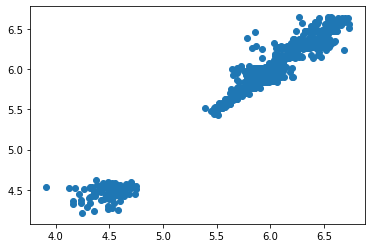

In [122]:
plt.scatter(y_test, test_tree_pred);

In [123]:
# Get predicted and actual Y values from test data set
# Actual price
y_test2 = y_test.reset_index(drop = True)
print(y_test2.tail(1))
# Predicted price
yhat = pd.Series(test_tree_pred)
print(yhat.tail(1))
# Shoe and date info
names_dates= combine_shoes_copy.iloc[cutpoint:][['name','sale_date']].reset_index(drop = True)
print(names_dates.tail(1))

1333    5.867034
Name: log_sale_price, dtype: float64
1333    5.867142
dtype: float64
                  name  sale_date
1333   yeezy 700 mauve 2019-05-17


In [124]:
# How well does the model predict if the price will go up or down? 
testing = pd.concat([names_dates, y_test2, yhat], axis = 1)
testing.columns = ['name', 'date', 'y', 'yhat']

In [125]:
testing.y = np.exp(testing.y)
testing.yhat = np.exp(testing.yhat)
testing = testing.set_index(['name', 'date'])
testing = testing.sort_index()
testing = testing.reset_index()

In [126]:
testing

,name,date,y,yhat
0,yeezy 500 blush,2019-01-10,629.666667,545.740713
1,yeezy 500 blush,2019-01-11,529.666667,554.079873
2,yeezy 500 blush,2019-01-12,580.000000,540.520710
3,yeezy 500 blush,2019-01-13,468.000000,526.978044
4,yeezy 500 blush,2019-01-14,559.500000,544.303063
5,yeezy 500 blush,2019-01-15,485.800000,548.954634
6,yeezy 500 blush,2019-01-16,590.200000,535.773276
7,yeezy 500 blush,2019-01-18,353.000000,536.177152
8,yeezy 500 blush,2019-01-19,375.200000,520.734948
9,yeezy 500 blush,2019-01-20,480.000000,466.865067


In [127]:
# Lagged y and yhat
testing['y_last'] = testing.groupby(['name']).y.shift(1)
testing['yhat_last'] = testing.groupby(['name']).yhat.shift(1)

testing

,name,date,y,yhat,y_last,yhat_last
0,yeezy 500 blush,2019-01-10,629.666667,545.740713,NaN,NaN
1,yeezy 500 blush,2019-01-11,529.666667,554.079873,629.666667,545.740713
2,yeezy 500 blush,2019-01-12,580.000000,540.520710,529.666667,554.079873
3,yeezy 500 blush,2019-01-13,468.000000,526.978044,580.000000,540.520710
4,yeezy 500 blush,2019-01-14,559.500000,544.303063,468.000000,526.978044
5,yeezy 500 blush,2019-01-15,485.800000,548.954634,559.500000,544.303063
6,yeezy 500 blush,2019-01-16,590.200000,535.773276,485.800000,548.954634
7,yeezy 500 blush,2019-01-18,353.000000,536.177152,590.200000,535.773276
8,yeezy 500 blush,2019-01-19,375.200000,520.734948,353.000000,536.177152
9,yeezy 500 blush,2019-01-20,480.000000,466.865067,375.200000,520.734948


In [128]:
# Compare both y and yhat to previous y value
testing['y_change'] = testing.y - testing.y_last
testing['yhat_change'] = testing.yhat - testing.y_last ## less accurate if you use yhat last

In [129]:
testing

,name,date,y,yhat,y_last,yhat_last,y_change,yhat_change
0,yeezy 500 blush,2019-01-10,629.666667,545.740713,NaN,NaN,NaN,NaN
1,yeezy 500 blush,2019-01-11,529.666667,554.079873,629.666667,545.740713,-100.000000,-75.586793
2,yeezy 500 blush,2019-01-12,580.000000,540.520710,529.666667,554.079873,50.333333,10.854043
3,yeezy 500 blush,2019-01-13,468.000000,526.978044,580.000000,540.520710,-112.000000,-53.021956
4,yeezy 500 blush,2019-01-14,559.500000,544.303063,468.000000,526.978044,91.500000,76.303063
5,yeezy 500 blush,2019-01-15,485.800000,548.954634,559.500000,544.303063,-73.700000,-10.545366
6,yeezy 500 blush,2019-01-16,590.200000,535.773276,485.800000,548.954634,104.400000,49.973276
7,yeezy 500 blush,2019-01-18,353.000000,536.177152,590.200000,535.773276,-237.200000,-54.022848
8,yeezy 500 blush,2019-01-19,375.200000,520.734948,353.000000,536.177152,22.200000,167.734948
9,yeezy 500 blush,2019-01-20,480.000000,466.865067,375.200000,520.734948,104.800000,91.665067


In [130]:
# Flags for increase in y 
testing['y_up'] = 0
testing.loc[testing.y_change >= 0, 'y_up'] = 1

testing['yhat_up'] = 0
testing.loc[testing.yhat_change >= 0, 'yhat_up'] = 1

testing = testing.dropna()

# Summary of results
testsum = testing.groupby(['y_up', 'yhat_up']).size()
testsum = pd.DataFrame(testsum).reset_index()
testsum.columns = ['y_up', 'yhat_up', 'n'] 

In [131]:
testsum

,y_up,yhat_up,n
0,0,0,429
1,0,1,197
2,1,0,268
3,1,1,429


In [132]:
pct_num = (testsum.loc[0, 'n'] + testsum.loc[3, 'n'])
pct_denom = testsum['n'].sum()
pct_correct = round(float(pct_num) / float(pct_denom), 3)

print(pct_num)
print(pct_denom)
print(pct_correct)
testing

858
1323
0.649


,name,date,y,yhat,y_last,yhat_last,y_change,yhat_change,y_up,yhat_up
1,yeezy 500 blush,2019-01-11,529.666667,554.079873,629.666667,545.740713,-100.000000,-75.586793,0,0
2,yeezy 500 blush,2019-01-12,580.000000,540.520710,529.666667,554.079873,50.333333,10.854043,1,1
3,yeezy 500 blush,2019-01-13,468.000000,526.978044,580.000000,540.520710,-112.000000,-53.021956,0,0
4,yeezy 500 blush,2019-01-14,559.500000,544.303063,468.000000,526.978044,91.500000,76.303063,1,1
5,yeezy 500 blush,2019-01-15,485.800000,548.954634,559.500000,544.303063,-73.700000,-10.545366,0,0
6,yeezy 500 blush,2019-01-16,590.200000,535.773276,485.800000,548.954634,104.400000,49.973276,1,1
7,yeezy 500 blush,2019-01-18,353.000000,536.177152,590.200000,535.773276,-237.200000,-54.022848,0,0
8,yeezy 500 blush,2019-01-19,375.200000,520.734948,353.000000,536.177152,22.200000,167.734948,1,1
9,yeezy 500 blush,2019-01-20,480.000000,466.865067,375.200000,520.734948,104.800000,91.665067,1,1
10,yeezy 500 blush,2019-01-21,601.000000,466.426173,480.000000,466.865067,121.000000,-13.573827,1,0


# To be continued..


# Forecast

In [147]:
# Predictions for the flask app
# Shoe list for forecast
shoe_list = [i for i in combine_shoes_copy['name'].unique()]
shoe_n = len(shoe_list)

# have a random shoe to check whenever i want to check a shoe
chosen_shoe = shoe_list[randint(0, shoe_n-1)]

# Data set for forecast - all the x variables but also name, sale price, pct vs last
forecast = combine_shoes_copy[['name' ,'retail_price','release_date','sale_lagged_0', 
                               'sale_lagged_6', 'sale_lagged_8','scaled_rolling_avg_4', 
                               'scaled_rolling_avg_5', 'scaled_rolling_avg_6','scaled_rolling_avg_7', 
                               'scaled_rolling_avg_8', 'scaled_rolling_avg_9','scaled_rolling_avg_10']]
# Choose a shoe for one run
x = forecast[forecast.name == chosen_shoe].reset_index(drop = True)
x.tail(1)

,name,retail_price,release_date,sale_lagged_0,sale_lagged_6,sale_lagged_8,scaled_rolling_avg_4,scaled_rolling_avg_5,scaled_rolling_avg_6,scaled_rolling_avg_7,scaled_rolling_avg_8,scaled_rolling_avg_9,scaled_rolling_avg_10
264,yeezy boost 350 v2 static reflective,220.0,2018-12-26,701.692308,638.714286,718.222222,0.841237,0.79357,0.795866,0.815165,0.823565,0.84437,0.847251


In [148]:
def make_new_row(df, mod):
    """ Forecast the sale price of the next sale using the model """
    # The last row of the dataframe & sale_price
    last_row = (len(df) - 1)
    last_sale_price = df.sale_lagged_0[last_row]

    # the row that will be created
    new_row_num = len(df)
    # Generate X values for next observation
    
    rolling_avg_4 = df.sale_lagged_0[(last_row - 3):(last_row + 1)].mean()
    rolling_avg_5 = df.sale_lagged_0[(last_row - 4):(last_row + 1)].mean()
    rolling_avg_6 = df.sale_lagged_0[(last_row - 5):(last_row + 1)].mean()
    rolling_avg_7 = df.sale_lagged_0[(last_row - 6):(last_row + 1)].mean()
    rolling_avg_8 = df.sale_lagged_0[(last_row - 7):(last_row + 1)].mean()
    rolling_avg_9 = df.sale_lagged_0[(last_row - 8):(last_row + 1)].mean()
    rolling_avg_10 = df.sale_lagged_0[(last_row - 9):(last_row + 1)].mean()
    
    # Normalize rolling average using global variables created above 
    scaled_rolling_avg_4 = (rolling_avg_4 - rolling_avg_4_min) / (rolling_avg_4_max - rolling_avg_4_min)
    scaled_rolling_avg_5 = (rolling_avg_5 - rolling_avg_5_min) / (rolling_avg_5_max - rolling_avg_5_min)
    scaled_rolling_avg_6 = (rolling_avg_6 - rolling_avg_6_min) / (rolling_avg_6_max - rolling_avg_6_min)
    scaled_rolling_avg_7 = (rolling_avg_7 - rolling_avg_7_min) / (rolling_avg_7_max - rolling_avg_7_min)
    scaled_rolling_avg_8 = (rolling_avg_8 - rolling_avg_8_min) / (rolling_avg_8_max - rolling_avg_8_min)
    scaled_rolling_avg_9 = (rolling_avg_9 - rolling_avg_9_min) / (rolling_avg_9_max - rolling_avg_9_min)
    scaled_rolling_avg_10 = (rolling_avg_10 - rolling_avg_10_min) / (rolling_avg_10_max - rolling_avg_10_min)  
    
    
    retail_price = df.retail_price[last_row]
    sale_lagged_6 = df.sale_lagged_6[last_row]
    sale_lagged_8 = df.sale_lagged_8[last_row]

    
    # New array with all the variables saved above
    new_row = [retail_price,sale_lagged_6,sale_lagged_8,scaled_rolling_avg_4,scaled_rolling_avg_5,scaled_rolling_avg_6,
              scaled_rolling_avg_7,scaled_rolling_avg_8,scaled_rolling_avg_9,scaled_rolling_avg_10]
    
    # convert new row to array and reshape
    new_array = np.asarray(new_row)
    new_array = new_array.reshape(1, -1) # to avoid numpy deprecation warning

    # Predict w/ tree model
    log_pred_value = tree_model.predict(new_array)

    pred_value = float(np.exp(log_pred_value)[0])

    # fill in sale price for new row, calc pct vs last on predicted sale price
    sale_price = pred_value # sample from distribution?

    pct_vs_last = sale_price / df.sale_lagged_0[last_row] - 1

    
    # adding everything together to make the new row
    
    post_pred = [df.name[last_row], sale_price, pct_vs_last]        
    new_row_for_df = post_pred + new_row
    df.loc[new_row_num] = new_row_for_df

    return pred_value, last_sale_price, df

In [149]:
# run it for the one shoe
pred_value, last_sale_price, newdf = make_new_row(x, tree_model)

In [150]:
## Forecast next sale for all shoes! 
pred_results = []
for i in shoe_list:
    # subset dataframe to i in shoe list
    xdf = forecast[forecast.name == i].reset_index(drop = True)
    # next 7 days
    for n in range(0, 7):
        n_label = n + 1
        pred_value, last_sale_price, xdf = make_new_row(xdf, tree_model)
        pred_results.append([i, n_label,last_sale_price,pred_value])
        
pred_results = pd.DataFrame(pred_results)

pred_results.columns = ['name', 'n', 'last_sale_price', 'predicted']

In [151]:
pred_results

,name,n,last_sale_price,predicted
0,yeezy 500 blush,1,617.750000,531.573241
1,yeezy 500 blush,2,200.000000,416.523046
2,yeezy 500 blush,3,531.573241,419.260146
3,yeezy 500 blush,4,416.523046,457.664491
4,yeezy 500 blush,5,419.260146,409.051283
5,yeezy 500 blush,6,457.664491,461.532471
6,yeezy 500 blush,7,409.051283,419.150549
7,yeezy powerphase calabasas core black,1,100.000000,84.535432
8,yeezy powerphase calabasas core black,2,120.000000,92.481983
9,yeezy powerphase calabasas core black,3,84.535432,93.021334


In [152]:
def AC_predict(x):
    value = abs(x['last_sale_price'] - x['predicted']) / x['last_sale_price']
    if value > 0.1:            
        return "wrong"
    else:
        return "correct"

    
pred_results['AC error rate'] = pred_results.apply(AC_predict , axis = 1)

In [153]:
AC_error = list(pred_results['AC error rate'].value_counts())

In [154]:
AC_error[1]/(AC_error[0] + AC_error[1])

0.2857142857142857

In [155]:
pred_results.loc[pred_results.name == chosen_shoe, ['predicted']]

,predicted
56,665.132075
57,539.658980
58,535.115419
59,511.000113
60,491.660263
61,497.215168
62,515.873515


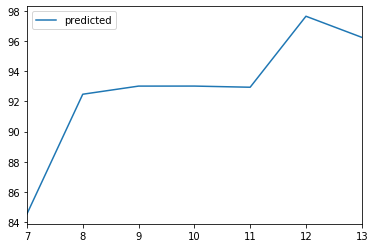

In [156]:
chosen_shoe = shoe_list[randint(0, shoe_n-1)]
pred_results.loc[pred_results.name == chosen_shoe, ['predicted']].plot()

In [157]:
# Get the mean of predictions for each shoe
pred2 = pred_results.copy()
pred2['avg_pred'] = pred2.groupby('name')['predicted'].transform('max')
pred2

,name,n,last_sale_price,predicted,AC error rate,avg_pred
0,yeezy 500 blush,1,617.750000,531.573241,wrong,531.573241
1,yeezy 500 blush,2,200.000000,416.523046,wrong,531.573241
2,yeezy 500 blush,3,531.573241,419.260146,wrong,531.573241
3,yeezy 500 blush,4,416.523046,457.664491,correct,531.573241
4,yeezy 500 blush,5,419.260146,409.051283,correct,531.573241
5,yeezy 500 blush,6,457.664491,461.532471,correct,531.573241
6,yeezy 500 blush,7,409.051283,419.150549,correct,531.573241
7,yeezy powerphase calabasas core black,1,100.000000,84.535432,wrong,97.659719
8,yeezy powerphase calabasas core black,2,120.000000,92.481983,wrong,97.659719
9,yeezy powerphase calabasas core black,3,84.535432,93.021334,wrong,97.659719


In [158]:
pred2 = pred2[pred2.n == 1]
pred2

,name,n,last_sale_price,predicted,AC error rate,avg_pred
0,yeezy 500 blush,1,617.750000,531.573241,wrong,531.573241
7,yeezy powerphase calabasas core black,1,100.000000,84.535432,wrong,97.659719
14,yeezy 500 super moon yellow,1,398.000000,386.940635,correct,386.940635
21,yeezy boost 350 v2 butter,1,317.000000,317.546952,correct,317.546952
28,yeezy 500 utility black,1,499.500000,523.569224,correct,523.569224
35,yeezy 700 mauve,1,353.200000,355.172698,correct,355.172698
42,yeezy boost 350 v2 sesame,1,352.222222,365.323339,correct,365.323339
49,yeezy 500 salt,1,426.000000,366.335664,wrong,366.335664
56,yeezy boost 350 v2 static reflective,1,701.692308,665.132075,correct,665.132075
63,yeezy boost 350 v2 static,1,485.000000,474.610686,correct,474.610686


In [159]:
pred2 = pred2[['name', 'last_sale_price', 'avg_pred']]
pred2

,name,last_sale_price,avg_pred
0,yeezy 500 blush,617.750000,531.573241
7,yeezy powerphase calabasas core black,100.000000,97.659719
14,yeezy 500 super moon yellow,398.000000,386.940635
21,yeezy boost 350 v2 butter,317.000000,317.546952
28,yeezy 500 utility black,499.500000,523.569224
35,yeezy 700 mauve,353.200000,355.172698
42,yeezy boost 350 v2 sesame,352.222222,365.323339
49,yeezy 500 salt,426.000000,366.335664
56,yeezy boost 350 v2 static reflective,701.692308,665.132075
63,yeezy boost 350 v2 static,485.000000,474.610686


In [160]:
pred2.columns = ['name', 'last_sale_price', 'predicted']
pred2

,name,last_sale_price,predicted
0,yeezy 500 blush,617.750000,531.573241
7,yeezy powerphase calabasas core black,100.000000,97.659719
14,yeezy 500 super moon yellow,398.000000,386.940635
21,yeezy boost 350 v2 butter,317.000000,317.546952
28,yeezy 500 utility black,499.500000,523.569224
35,yeezy 700 mauve,353.200000,355.172698
42,yeezy boost 350 v2 sesame,352.222222,365.323339
49,yeezy 500 salt,426.000000,366.335664
56,yeezy boost 350 v2 static reflective,701.692308,665.132075
63,yeezy boost 350 v2 static,485.000000,474.610686


In [161]:
pred2.predicted = pred2['predicted'].apply(lambda x: round(x, 2))
pred2.head()

C:\Users\chenz\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,name,last_sale_price,predicted
0,yeezy 500 blush,617.75,531.57
7,yeezy powerphase calabasas core black,100.00,97.66
14,yeezy 500 super moon yellow,398.00,386.94
21,yeezy boost 350 v2 butter,317.00,317.55
28,yeezy 500 utility black,499.50,523.57


In [162]:
# add the up or down column and send to csv for the flask app
pred2['change'] = pred2['predicted'] - pred2['last_sale_price']
pred2['trend'] = 'down'
pred2.loc[pred2.change > 0, 'trend'] = 'up'
pred2.to_csv('shoe_forecast.csv', index = False)
pred2

C:\Users\chenz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\chenz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chenz\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,name,last_sale_price,predicted,change,trend
0,yeezy 500 blush,617.750000,531.57,-86.180000,down
7,yeezy powerphase calabasas core black,100.000000,97.66,-2.340000,down
14,yeezy 500 super moon yellow,398.000000,386.94,-11.060000,down
21,yeezy boost 350 v2 butter,317.000000,317.55,0.550000,up
28,yeezy 500 utility black,499.500000,523.57,24.070000,up
35,yeezy 700 mauve,353.200000,355.17,1.970000,up
42,yeezy boost 350 v2 sesame,352.222222,365.32,13.097778,up
49,yeezy 500 salt,426.000000,366.34,-59.660000,down
56,yeezy boost 350 v2 static reflective,701.692308,665.13,-36.562308,down
63,yeezy boost 350 v2 static,485.000000,474.61,-10.390000,down


In [163]:
pred2.describe()

,last_sale_price,predicted,change
count,11.000000,11.000000,11.000000
mean,438.942230,428.655455,-10.286775
std,165.106949,159.892021,38.724913
min,100.000000,97.660000,-86.180000
25%,352.711111,360.245000,-23.811154
50%,426.000000,386.940000,-2.340000
75%,538.750000,527.570000,7.533889
max,701.692308,665.130000,53.350000


In [164]:
pred2.trend.value_counts()

down    6
up      5
Name: trend, dtype: int64